In [33]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('./src/car_dataset_cleaned.csv')

In [35]:
X = df.drop(['prix', 'longueur_voiture', 'largeur_voiture', 'hauteur_voiture', 'taux_compression', 'course'], axis=1)
y = df['prix']

In [36]:
numeric_features = ['empattement', 'poids_vehicule', 'nombre_cylindres', 'taille_moteur', 'taux_alésage',
                    'chevaux', 'tour_moteur', 'consommation_ville',
                    'consommation_autoroute']
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])
categorical_features = ['etat_de_route', 'marque', 'modele', 'carburant', 'turbo', 'nombre_portes',
                        'type_vehicule', 'transmission', 'emplacement_moteur', 'type_moteur',
                        'systeme_carburant']
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [37]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [38]:
# séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# entraînement du modèle
pipeline.fit(X_train, y_train)
# calcul de la performance du modèle sur le jeu de test
score = pipeline.score(X_test, y_test)
print(f"{score}")

0.9331780570876544


In [39]:
with open('model_car.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

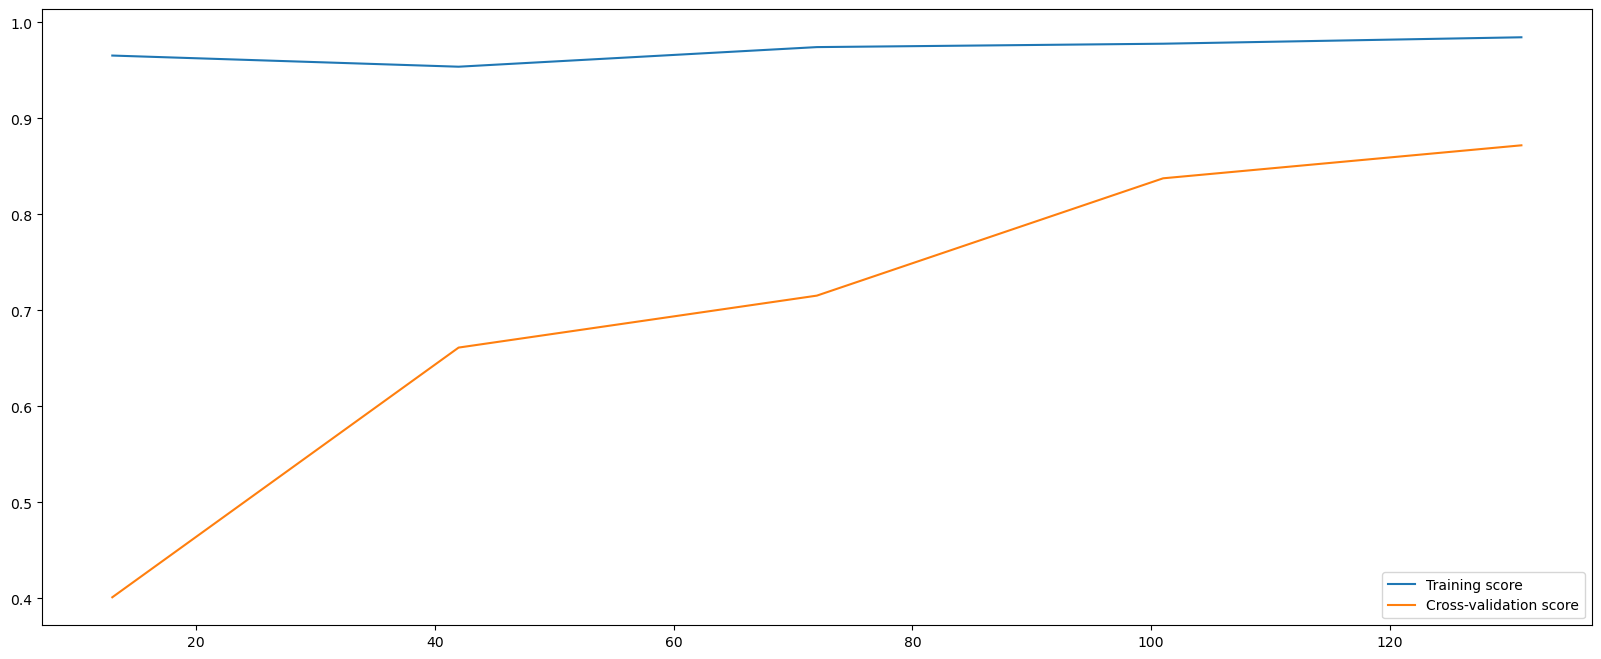

In [40]:
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(20, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend()
plt.show()